In [23]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu
from sklearn.metrics import (
   confusion_matrix, ConfusionMatrixDisplay,
   roc_curve, auc,
   precision_recall_curve, average_precision_score
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [24]:
symbol = "BTCUSDT"
if Path("Users").exists():  # Windows
    input_path = r"C:\Users\phamhoa\Downloads\thesis\data\Binance\agg\500\VPIN"
    file_path = rf"{input_path}\{symbol}.csv"
else:  # Macbook
    input_path = "/Users/hoapham/Documents/Learning/thesis/data/Binance/agg/500/VPIN"
    file_path = f"{input_path}/{symbol}.csv"

df = pd.read_csv(file_path, parse_dates=['Time'])

df = df.drop(columns=["Unnamed: 0"], errors='ignore')

In [25]:
df.columns

Index(['Time', 'Buy', 'Sell', 'Price', 'BidPrice', 'AskPrice', 'Volume',
       'VPIN', 'CDF', 'Roll', 'RollImpact', 'KyleLambda', 'Returns',
       'AmihudLambda', 'BidAskSpread', 'SpreadChangeSign',
       'RealizedVolatility', 'RealizedVolatilitySign', 'ReturnsSign',
       'Skewness', 'Kurtosis', 'JB_rolling', 'JB_ChangeSign', 'AR',
       'AR_ChangeSign', 'SkewnessSign', 'KurtosisSign', 'MA_20', 'MA_50',
       'MASign'],
      dtype='object')

In [26]:
df["Time"] = pd.to_datetime(df["Time"])

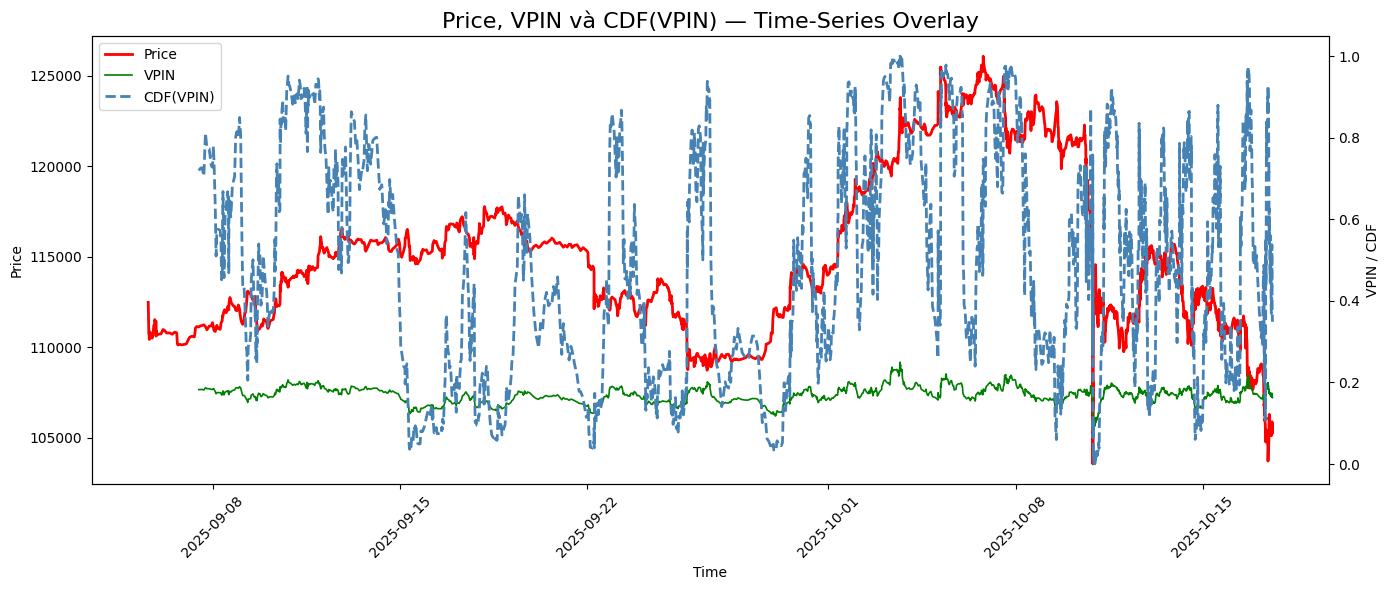

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# --- Axis 1: Price (Left Y) ---
ax1 = plt.gca()
ax1.plot(df['Time'], df['Price'], color='red', linewidth=2, label='Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.tick_params(axis='y')

# --- Axis 2: VPIN + CDF (Right Y) ---
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['VPIN'], color='green', linewidth=1.2, label='VPIN')
ax2.plot(df['Time'], df['CDF'], color='steelblue', linestyle='--', linewidth=2, label='CDF(VPIN)')
ax2.set_ylabel('VPIN / CDF')
ax2.tick_params(axis='y')

# --- Rotate X labels ---
for label in ax1.get_xticklabels():
    label.set_rotation(45)

# --- Title ---
plt.title("Price, VPIN và CDF(VPIN) — Time-Series Overlay", fontsize=16)

# --- Combined Legend ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


In [28]:
df.tail()

,Time,Buy,Sell,Price,BidPrice,AskPrice,Volume,VPIN,CDF,Roll,...,Kurtosis,JB_rolling,JB_ChangeSign,AR,AR_ChangeSign,SkewnessSign,KurtosisSign,MA_20,MA_50,MASign
2160,2025-10-17 13:50:29+00:00,160.973092,180.026908,105280.224107,105296.665270,105265.523055,341.0,0.168665,0.437618,271.968077,...,-0.400804,24.443490,-1.0,0.350529,1.0,-1.0,1.0,105654.086697,105150.317908,1
2161,2025-10-17 13:52:37+00:00,218.408714,122.591286,105543.862991,105554.608261,105524.719210,341.0,0.173576,0.537807,249.661071,...,-0.476703,25.314680,1.0,0.264309,1.0,-1.0,-1.0,105692.238193,105148.743799,1
2162,2025-10-17 14:01:13+00:00,187.988022,153.011978,105892.643167,105889.227600,105896.839477,341.0,0.168063,0.428166,255.275771,...,-0.500720,25.574126,1.0,0.302629,1.0,-1.0,-1.0,105742.998618,105160.784278,1
2163,2025-10-17 14:12:05+00:00,168.757408,172.242592,105511.501000,105533.427784,105490.017886,341.0,0.164264,0.366730,237.355186,...,-0.598070,27.048575,1.0,0.246358,1.0,-1.0,-1.0,105748.488815,105163.550926,1
2164,2025-10-17 14:26:11+00:00,165.175682,175.824318,105277.409562,105270.264796,105284.121612,341.0,0.163119,0.348771,253.764652,...,-0.650093,27.860147,1.0,0.263134,1.0,-1.0,-1.0,105715.845750,105163.533472,1


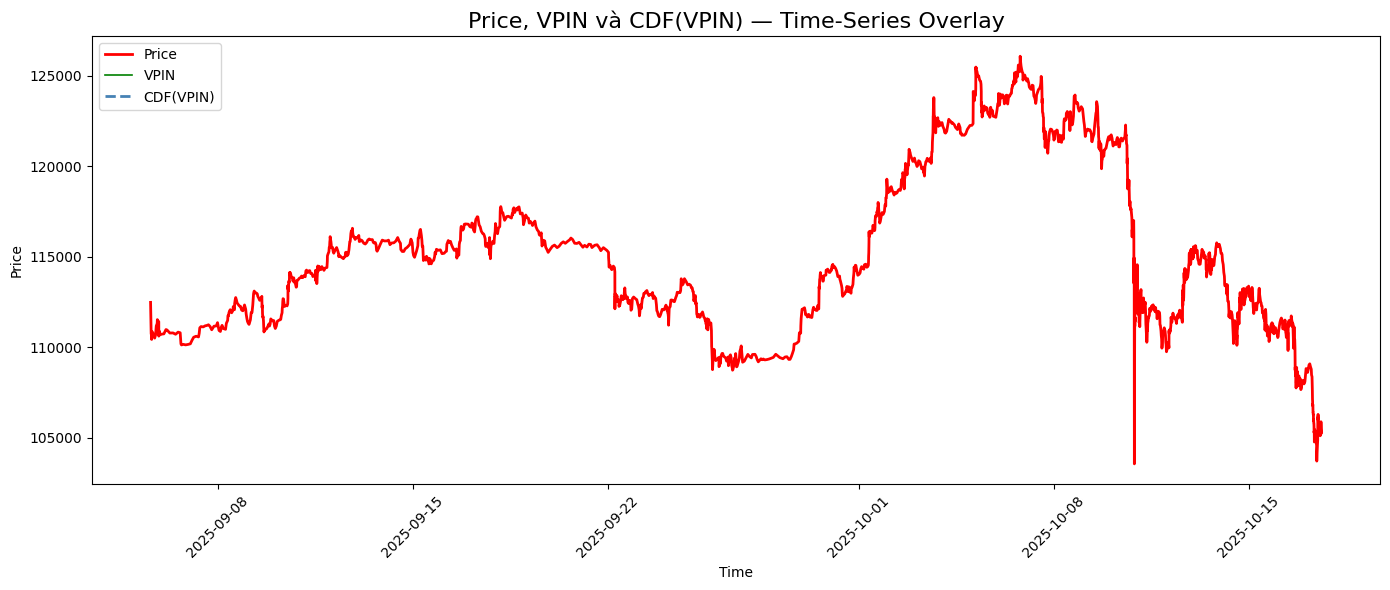

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# --- Axis 1: Price (Left Y) ---
ax1 = plt.gca()
ax1.plot(df['Time'], df['Price'], color='red', linewidth=2, label='Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.tick_params(axis='y')

# # --- Axis 2: VPIN + CDF (Right Y) ---
# ax2 = ax1.twinx()
# ax2.plot(df['Time'], df['VPIN'], color='green', linewidth=1.2, label='VPIN')
# ax2.plot(df['Time'], df['CDF'], color='steelblue', linestyle='--', linewidth=2, label='CDF(VPIN)')
# ax2.set_ylabel('VPIN / CDF')
# ax2.tick_params(axis='y')

# --- Rotate X labels ---
for label in ax1.get_xticklabels():
    label.set_rotation(45)

# --- Title ---
plt.title("Price, VPIN và CDF(VPIN) — Time-Series Overlay", fontsize=16)

# --- Combined Legend ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


In [30]:
df["toxic_flow"] = (df["Buy"] - df["Sell"]).abs()

In [31]:


window = 30
events = df[df["CDF"] > 0.95].index   # định nghĩa sự kiện

event_matrix = []

for idx in events:
    start = idx - window
    end = idx + window
    
    # bỏ sự kiện không đủ dữ liệu 2 phía
    if start < 0 or end >= len(df):
        continue
    
    values = df['toxic_flow'].iloc[start:end+1].values
    event_matrix.append(values)

event_matrix = np.array(event_matrix)
median_reaction = np.median(event_matrix, axis=0)


In [32]:
x_axis = np.arange(-window, window+1)

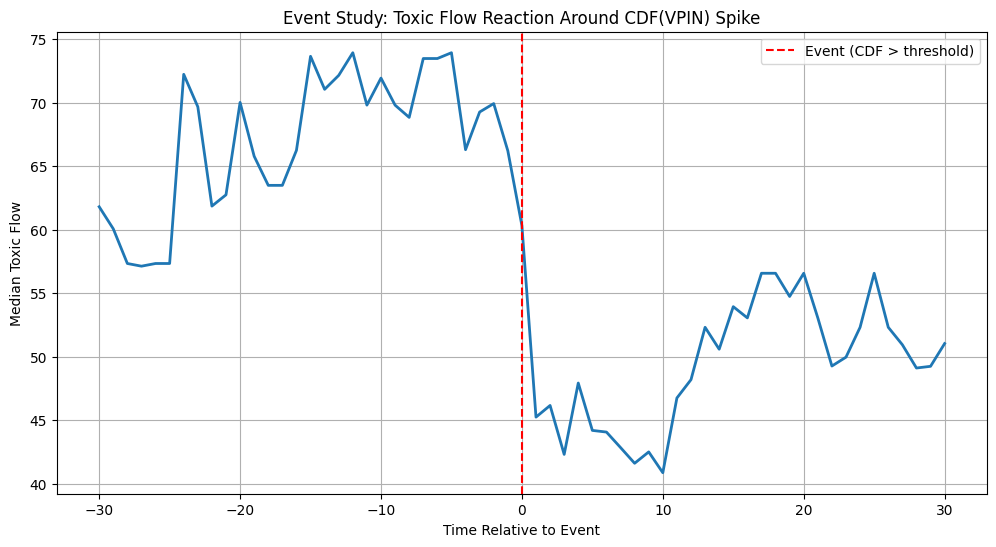

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(x_axis, median_reaction, linewidth=2)
plt.axvline(0, linestyle='--', color='red', label='Event (CDF > threshold)')
plt.title("Event Study: Toxic Flow Reaction Around CDF(VPIN) Spike")
plt.xlabel("Time Relative to Event")
plt.ylabel("Median Toxic Flow")
plt.grid(True)
plt.legend()
plt.show()
